# Spam Email Detector Project 

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import ipywidgets as widgets
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [4]:
data = pd.read_csv("spam.csv", encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']
data['label_num'] = data['label'].map({'ham':0, 'spam':1})

print(" Cleaned dataset:")
print(data.head())



 Cleaned dataset:
  label                                            message  label_num
0   ham  Go until jurong point, crazy.. Available only ...          0
1   ham                      Ok lar... Joking wif u oni...          0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...          1
3   ham  U dun say so early hor... U c already then say...          0
4   ham  Nah I don't think he goes to usf, he lives aro...          0


### Check for null values

In [5]:
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 label        0
message      0
label_num    0
dtype: int64


### Data Visualization

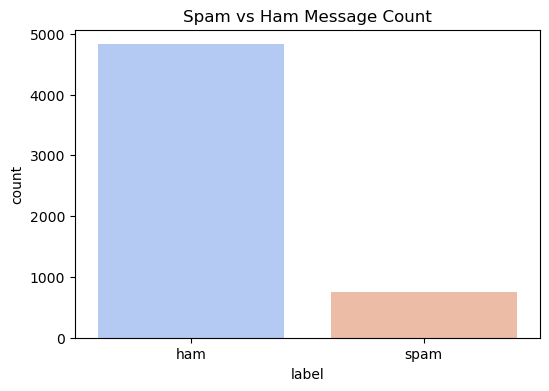

In [6]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=data, palette='coolwarm')
plt.title("Spam vs Ham Message Count")
plt.show()

### Text Vectorization

In [7]:
vectorizer = TfidfVectorizer(stop_words='english', lowercase=True)
X = vectorizer.fit_transform(data['message'])
y = data['label_num']

### Split Dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train ML Models

In [9]:
# Model 1: Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_acc = accuracy_score(y_test, nb_pred)

# Model 2: Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

# Model 3: Support Vector Machine
svm_model = LinearSVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)

### Compare Accuracies


 Accuracy Comparison:
                    Model  Accuracy
0             Naive Bayes  0.968610
1     Logistic Regression  0.944395
2  Support Vector Machine  0.973991


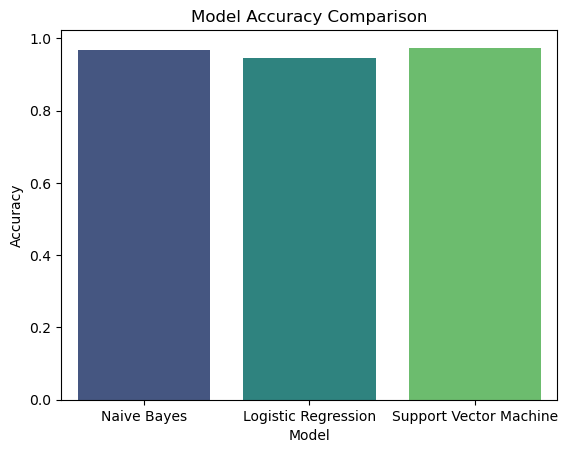

In [10]:
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression', 'Support Vector Machine'],
    'Accuracy': [nb_acc, lr_acc, svm_acc]
})

print("\n Accuracy Comparison:")
print(results)

sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.title("Model Accuracy Comparison")
plt.show()


### Evaluate Best Model

In [11]:
best_model = max(results['Accuracy'])
best_name = results.loc[results['Accuracy'] == best_model, 'Model'].values[0]
print(f"Best Model: {best_name} with Accuracy = {best_model:.2f}")


Best Model: Support Vector Machine with Accuracy = 0.97


### Classification Report (Using Best Model: SVM)

In [12]:
print("\nClassification Report (SVM):")
print(classification_report(y_test, svm_pred))


Classification Report (SVM):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.97      0.83      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



### Prediction Function

In [13]:
def predict_email(text):
    vect = vectorizer.transform([text])
    pred = svm_model.predict(vect)
    return "SPAM" if pred == 1 else "NOT SPAM"

test_message = "Congratulations! You won a free vacation. Claim your prize now!"
print("\nTest Message Prediction:")
print(test_message, "=>", predict_email(test_message))




Test Message Prediction:
Congratulations! You won a free vacation. Claim your prize now! => SPAM


### FRONTEND using ipywidgets

In [15]:
display(Markdown("##  Spam Email Detector"))

# Input Text Area
email_input = widgets.Textarea(
    value='',
    placeholder='Enter your email message here...',
    description='Message:',
    layout=widgets.Layout(width='80%', height='100px')
)

# Predict Button
predict_button = widgets.Button(
    description='Check Spam',
    button_style='success',
    icon='search'
)

# Output Area
output = widgets.Output()

# Function to run when button is clicked
def on_predict_click(b):
    with output:
        output.clear_output()
        text = email_input.value.strip()
        if text == "":
            display(Markdown("⚠️ **Please enter a message first!**"))
        else:
            result = predict_email(text)
            if "SPAM" in result:
                display(Markdown(f"###  **This Email is SPAM!**"))
            else:
                display(Markdown(f"###  **This Email is NOT SPAM!**"))

# Connect button click to function
predict_button.on_click(on_predict_click)

# Display UI
display(Markdown("### Type your email message below and click 'Check Spam':"))
display(email_input)
display(predict_button)
display(output)

display(Markdown("---"))
display(Markdown(" **Tip:** Try messages like 'You have won a lottery!' or 'Let’s meet tomorrow.' to see predictions."))




##  Spam Email Detector

### Type your email message below and click 'Check Spam':

Textarea(value='', description='Message:', layout=Layout(height='100px', width='80%'), placeholder='Enter your…

Button(button_style='success', description='Check Spam', icon='search', style=ButtonStyle())

Output()

---

 **Tip:** Try messages like 'You have won a lottery!' or 'Let’s meet tomorrow.' to see predictions.